In [1]:
import torch, sys, os
print("torch version:", torch.__version__)
print("torch file:", torch.__file__)
print("python exe:", sys.executable)

torch version: 2.2.2
torch file: /Users/akukarhinen/Documents/Junction2025/junction2025/nlp_venv/lib/python3.9/site-packages/torch/__init__.py
python exe: /Users/akukarhinen/Documents/Junction2025/junction2025/nlp_venv/bin/python


In [2]:
import gensim.downloader as api
import numpy as np

model = api.load("word2vec-google-news-300")

sent1 = "The bank must maintain adequate capital buffers".lower().split()
sent2 = "Institutions are required to hold sufficient own funds.".lower().split()

def embed(words):
    return np.vstack([model[w] if w in model else np.zeros(300) for w in words])

E1 = embed(sent1)
E2 = embed(sent2)

# Cosine similarity matrix
sim_matrix = E1 @ E2.T / (np.linalg.norm(E1, axis=1, keepdims=True) * np.linalg.norm(E2, axis=1))
print(sim_matrix)

[[0.13623154 0.23689821 0.20995132        nan 0.22650349 0.13074578
  0.25227632        nan]
 [0.37725252 0.03339612 0.05245269        nan 0.13152784 0.1404622
  0.10198713        nan]
 [0.14370252 0.37898861 0.54805836        nan 0.08560523 0.24463263
  0.22468979        nan]
 [0.1738258  0.14112993 0.25101915        nan 0.34894512 0.32238806
  0.18131067        nan]
 [0.12547755 0.11812889 0.42549869        nan 0.1456451  0.74052165
  0.16267347        nan]
 [0.27553182 0.06374593 0.12505686        nan 0.11353865 0.24362952
  0.0681427         nan]
 [0.13551122 0.06362474 0.2136561         nan 0.03422849 0.21711807
  0.05391201        nan]]


/var/folders/cp/g2spfqpn0kz_rpjy3xdvh25c0000gn/T/ipykernel_14908/2815300427.py:16: RuntimeWarning: invalid value encountered in divide
  sim_matrix = E1 @ E2.T / (np.linalg.norm(E1, axis=1, keepdims=True) * np.linalg.norm(E2, axis=1))


# Functions that produce visualizations for Risk Category overlaps and contradictions


In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_risk_coverage(risk_categories, sections_per_risk):
    """
    Bar chart: total number of sections involving each risk category.

    Parameters
    ----------
    risk_categories : list of str
        Names of risk categories (e.g. ["Credit", "Liquidity", "Operational"]).
    sections_per_risk : list of int or float
        Total number of sections per risk category (same order as risk_categories).

    Returns
    -------
    fig : matplotlib.figure.Figure
    ax : matplotlib.axes.Axes
    """
    x = np.arange(len(risk_categories))

    fig, ax = plt.subplots(figsize=(6, 4))
    bars = ax.bar(x, sections_per_risk)

    ax.set_xticks(x)
    ax.set_xticklabels(risk_categories, rotation=30, ha="right")
    ax.set_ylabel("Number of sections [count]")
    ax.set_xlabel("Risk category")
    ax.set_title("Regulatory coverage by risk category")

    # Make y-axis start at 0, add a small margin
    upper = max(sections_per_risk) if len(sections_per_risk) > 0 else 1
    ax.set_ylim(0, upper * 1.1)

    # Grid for readability
    ax.grid(True, axis="y", linestyle="--", linewidth=0.5)

    # Clean up spines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f"{height}",
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha="center",
            va="bottom",
            fontsize=8
        )

    fig.tight_layout()
    fig.savefig("risk_coverage.png", dpi=300)
    return fig, ax


def plot_overlap_vs_contradiction(risk_categories, overlap_counts, contradiction_counts):
    """
    Grouped bar chart: overlaps vs contradictions per risk category.

    Parameters
    ----------
    risk_categories : list of str
        Names of risk categories.
    overlap_counts : list of int or float
        Number of overlapping sections per risk category.
    contradiction_counts : list of int or float
        Number of contradicting sections per risk category.

    Returns
    -------
    fig : matplotlib.figure.Figure
    ax : matplotlib.axes.Axes
    """
    x = np.arange(len(risk_categories))
    width = 0.35

    fig, ax = plt.subplots(figsize=(6, 4))
    bars_overlap = ax.bar(x - width/2, overlap_counts, width, label="Overlapping sections")
    bars_contra = ax.bar(x + width/2, contradiction_counts, width, label="Contradicting sections")

    ax.set_xticks(x)
    ax.set_xticklabels(risk_categories, rotation=30, ha="right")
    ax.set_ylabel("Number of sections [count]")
    ax.set_xlabel("Risk category")
    ax.set_title("Overlapping vs contradicting requirements by risk")

    upper = max(max(overlap_counts), max(contradiction_counts)) if overlap_counts and contradiction_counts else 1
    ax.set_ylim(0, upper * 1.1)

    ax.grid(True, axis="y", linestyle="--", linewidth=0.5)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.legend(frameon=False)

    # Add value labels
    for bars in (bars_overlap, bars_contra):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(
                f"{height}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha="center",
                va="bottom",
                fontsize=8
            )

    fig.tight_layout()
    fig.savefig("overlap_vs_contradiction.png", dpi=300)
    return fig, ax


def plot_overlap_contradiction_intensity(risk_categories,
                                         sections_per_risk,
                                         overlap_counts,
                                         contradiction_counts):
    """
    Bar chart of relative intensity: share of sections that are overlapping or contradicting,
    per risk category.

    Parameters
    ----------
    risk_categories : list of str
        Names of risk categories.
    sections_per_risk : list of int or float
        Total number of sections per risk category.
    overlap_counts : list of int or float
        Number of overlapping sections per risk category.
    contradiction_counts : list of int or float
        Number of contradicting sections per risk category.

    Returns
    -------
    fig : matplotlib.figure.Figure
    ax : matplotlib.axes.Axes
    """
    sections_per_risk = np.asarray(sections_per_risk, dtype=float)
    overlap_counts = np.asarray(overlap_counts, dtype=float)
    contradiction_counts = np.asarray(contradiction_counts, dtype=float)

    with np.errstate(divide='ignore', invalid='ignore'):
        overlap_ratio = np.where(sections_per_risk > 0,
                                 overlap_counts / sections_per_risk,
                                 0.0)
        contradiction_ratio = np.where(sections_per_risk > 0,
                                       contradiction_counts / sections_per_risk,
                                       0.0)

    x = np.arange(len(risk_categories))
    width = 0.35

    fig, ax = plt.subplots(figsize=(6, 4))
    bars_overlap = ax.bar(x - width/2, overlap_ratio, width, label="Overlap share")
    bars_contra = ax.bar(x + width/2, contradiction_ratio, width, label="Contradiction share")

    ax.set_xticks(x)
    ax.set_xticklabels(risk_categories, rotation=30, ha="right")
    ax.set_ylabel("Share of sections [proportion]")
    ax.set_xlabel("Risk category")
    ax.set_title("Relative intensity of overlaps and contradictions by risk")

    upper = max(overlap_ratio.max(initial=0), contradiction_ratio.max(initial=0))
    ax.set_ylim(0, max(upper * 1.1, 0.1))

    ax.grid(True, axis="y", linestyle="--", linewidth=0.5)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.legend(frameon=False)

    # Add percentage labels
    for bars, data in ((bars_overlap, overlap_ratio), (bars_contra, contradiction_ratio)):
        for bar, val in zip(bars, data):
            height = bar.get_height()
            ax.annotate(
                f"{val:.1%}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha="center",
                va="bottom",
                fontsize=8
            )

    fig.tight_layout()
    fig.savefig("intensity.png", dpi=300)
    return fig, ax

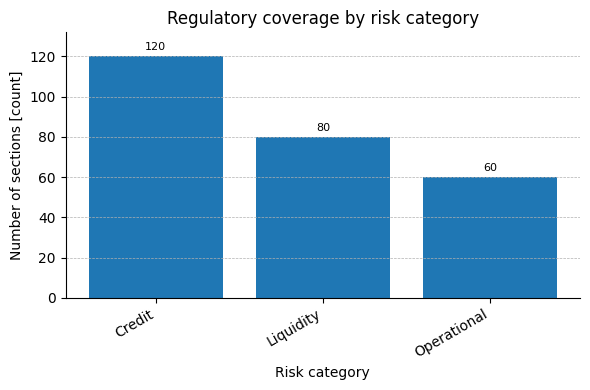

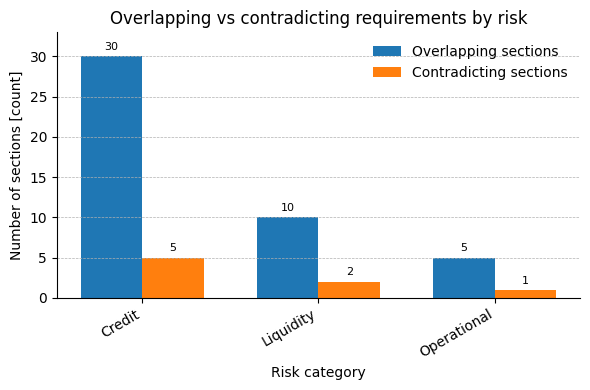

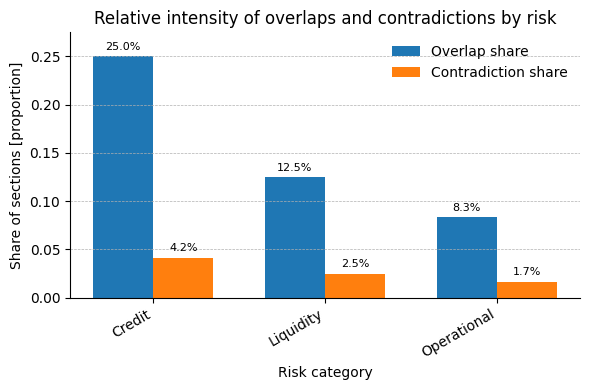

In [4]:
risk_categories = ["Credit", "Liquidity", "Operational"]
sections_per_risk = [120, 80, 60]
overlap_counts = [30, 10, 5]
contradiction_counts = [5, 2, 1]

fig1, ax1 = plot_risk_coverage(risk_categories, sections_per_risk)
fig2, ax2 = plot_overlap_vs_contradiction(risk_categories, overlap_counts, contradiction_counts)
fig3, ax3 = plot_overlap_contradiction_intensity(risk_categories,
                                                 sections_per_risk,
                                                 overlap_counts,
                                                 contradiction_counts)

plt.show()  # or save individual figures with fig.savefig("name.png", dpi=300)


In [5]:
import numpy as np
import gensim.downloader as api
import string

# Word to vec in order to calculate heatmaps between each word and each other word 
#--> heatmap attention maps
model = api.load("word2vec-google-news-300")

def tokenize(text):
    tokens = text.lower().split()
    return [t.strip(string.punctuation) for t in tokens]

sent1 = tokenize("The bank must maintain adequate capital buffers")
sent2 = tokenize("Institutions are required to hold sufficient own funds.")

def word_vectors(words, model, dim=300):
    vecs = []
    for w in words:
        if w in model:
            vecs.append(model[w])
        else:
            vecs.append(np.zeros(dim))
    return np.vstack(vecs)

# Embedding matrices
E1 = word_vectors(sent1, model)
E2 = word_vectors(sent2, model)

# Cosine similarity matrix
def cosine_sim_matrix(A, B):
    A_norm = A / (np.linalg.norm(A, axis=1, keepdims=True) + 1e-9) # Prevent division by zero
    B_norm = B / (np.linalg.norm(B, axis=1, keepdims=True) + 1e-9) # Prevent division by zero 
    return A_norm @ B_norm.T

sim_matrix = cosine_sim_matrix(E1, E2)

# One similarity score per word in each sentence
sim_scores_1 = sim_matrix.max(axis=1)  # sentence 1 → how similar each word is to sentence 2
sim_scores_2 = sim_matrix.max(axis=0)  # sentence 2 → how similar each word is to sentence 1

In [6]:
import matplotlib.pyplot as plt
from matplotlib import colors
# Plotting functions
def pastelize(color, alpha=0.35):
    r, g, b, a = color
    return (1 - alpha*(1-r), 1 - alpha*(1-g), 1 - alpha*(1-b), a)

def plot_sentence_with_scores(words, scores, title, cmap="Blues", pastel_strength=0.35):
    scores = np.asarray(scores)
    cmap_obj = plt.get_cmap(cmap)
    
    # normalize 0–1
    scores_norm = (scores - scores.min()) / (scores.max() - scores.min() + 1e-9)

    fig, ax = plt.subplots(figsize=(max(8, len(words)*0.5), 2.5))
    ax.set_title(title)

    x = 0.02
    y = 0.5

    for word, val in zip(words, scores_norm):
        base = cmap_obj(val)
        pastel = pastelize(base, alpha=pastel_strength)

        ax.text(
            x, y, word + " ",
            fontsize=12,
            ha="left", va="center",
            bbox=dict(
                facecolor=pastel,
                edgecolor="none",
                boxstyle="round,pad=0.25"
            )
        )
        x += (len(word)*0.015) + 0.03

    ax.axis("off")
    fig.tight_layout()
    return fig, ax

(<Figure size 800x250 with 1 Axes>,
 <Axes: title={'center': 'Sentence 2 — similarity to Sentence 1'}>)

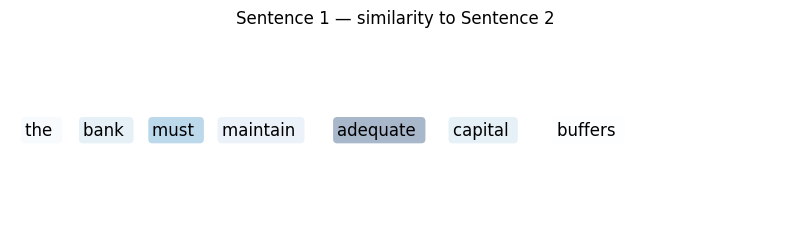

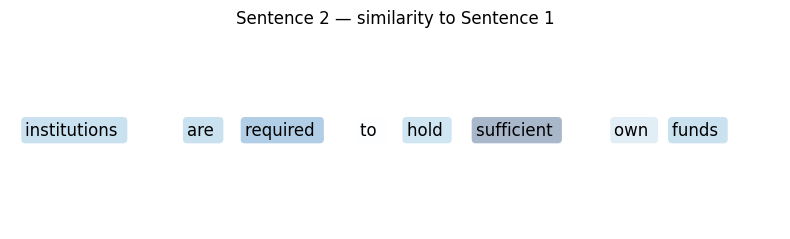

In [7]:
plot_sentence_with_scores(sent1, sim_scores_1,
                          title="Sentence 1 — similarity to Sentence 2",
                          cmap="Blues")

plot_sentence_with_scores(sent2, sim_scores_2,
                          title="Sentence 2 — similarity to Sentence 1",
                          cmap="Blues")

In [52]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification


# Load NLI model (for contradiction)
nli_name = "roberta-large-mnli"
nli_tok = AutoTokenizer.from_pretrained(nli_name)
nli_model = AutoModelForSequenceClassification.from_pretrained(nli_name)
nli_model.eval()

def contradiction_score(premise, hypothesis):
    inputs = nli_tok(premise, hypothesis, return_tensors="pt", truncation=True)
    with torch.no_grad():
        logits = nli_model(**inputs).logits
    probs = torch.softmax(logits, dim=-1).squeeze().tolist()
    # For RoBERTa-MNLI the label order is: [entailment, neutral, contradiction]
    return probs[2]  # contradiction probability

def word_level_contradiction_scores(words, other_sentence_text):
    scores = []
    for w in words:
        # Each word is compared against the full meaning of the other sentence
        c = contradiction_score(other_sentence_text, w)
        scores.append(c)
    return np.array(scores)




Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [53]:
sent1_text = "The bank must maintain adequate capital buffers"
sent2_text = "Institutions are not required to hold sufficient own funds."

# sent1_text = "Institutions should ensure an adequate rotation of valuers and define the number of sequential individual valuations of the same property that can be performed by the same valuer. Any further revaluations beyond this number should result in the rotation of the valuer, resulting in the appointment of either a different internal valuer or a different external valuer."
# sent2_text = "Credit institutions should ensure adequate rotation of appraisers, i.e. two sequential individual valuations of the immovable property by the same appraiser should result in the rotation of the appraiser, resulting in the appointment of either a different internal appraiser or a different external appraisal provider."

sent1 = sent1_text.lower().split()
sent2 = sent2_text.lower().split()

contra_scores_1 = word_level_contradiction_scores(sent1, sent2_text)
contra_scores_2 = word_level_contradiction_scores(sent2, sent1_text)

In [60]:
def pastelize(color, alpha=0.35):
    r, g, b, a = color
    return (1 - alpha*(1-r), 1 - alpha*(1-g), 1 - alpha*(1-b), a)

def plot_sentence_with_contradiction(words, scores, title="Contradiction Heatmap"):
    scores = np.asarray(scores)
    cmap_obj = plt.get_cmap("Reds")

    # normalize 0–1
    s_norm = (scores - scores.min()) / (scores.max() - scores.min() + 1e-9)

    fig, ax = plt.subplots(figsize=(max(8, len(words)*0.5), 2.5))
    ax.set_title(title)

    x = 0.02
    y = 0.5

    for w, val in zip(words, s_norm):
        base = cmap_obj(val)
        pastel = pastelize(base)

        ax.text(
            x, y, w + " ",
            fontsize=12,
            ha="left", va="center",
            bbox=dict(
                facecolor=pastel,
                edgecolor="none",
                boxstyle="round,pad=0.25"
            )
        )
        x += (len(w)*0.015) + 0.03

    ax.axis("off")
    fig.tight_layout()
    return fig, ax

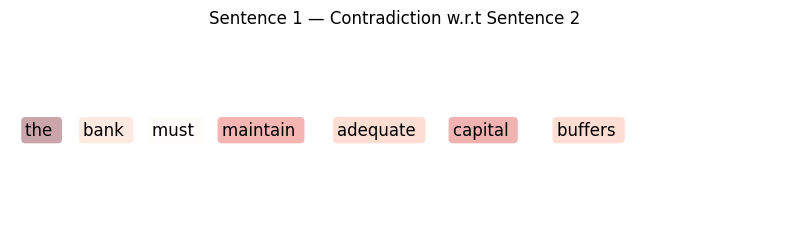

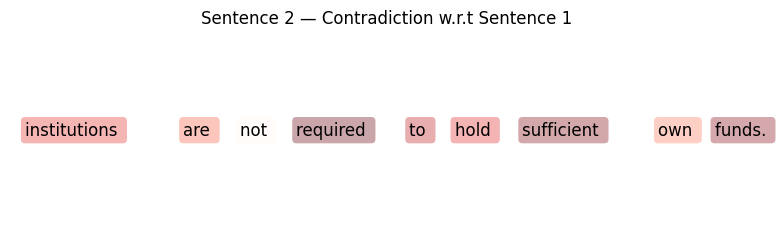

In [61]:
fig1,ax1 =plot_sentence_with_contradiction(
    sent1,
    contra_scores_1,
    title="Sentence 1 — Contradiction w.r.t Sentence 2"
)
fig1.savefig("contra1.png")
# Sentence 2 highlighted by contradiction wrt sentence 1
fig2,ax2 =plot_sentence_with_contradiction(
    sent2,
    contra_scores_2,
    title="Sentence 2 — Contradiction w.r.t Sentence 1"
)
fig2.savefig("contra2.png")